# Plotting Multiple Data Series

Complete the following set of exercises to solidify your knowledge of plotting multiple data series with pandas, matplotlib, and seaborn. Part of the challenge that comes with plotting multiple data series is transforming the data into the form needed to visualize it like you want. For some of the exercises in this lab, you will need to transform the data into the form most appropriate for generating the visualization and then create the plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
liquor = pd.read_csv('liquor_store_sales.csv')
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [4]:
liquor.dtypes

Year                 int64
Month                int64
Supplier            object
ItemCode            object
Description         object
ItemType            object
RetailSales        float64
RetailTransfers    float64
WarehouseSales     float64
dtype: object

## 1. Create a bar chart with bars for total Retail Sales, Retail Transfers, and Warehouse Sales by Item Type.

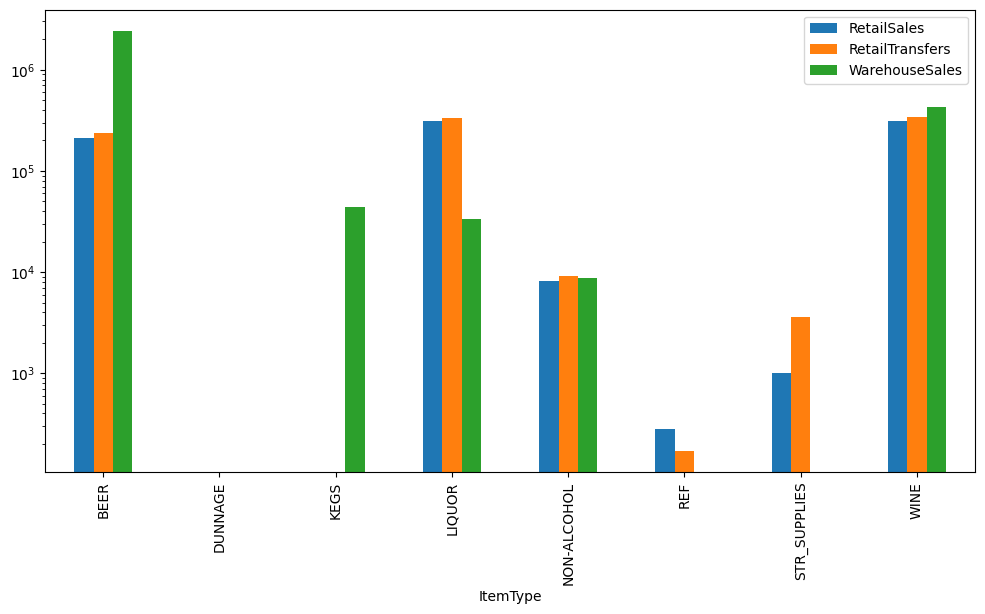

In [5]:
sales = liquor.groupby("ItemType")[["RetailSales","RetailTransfers","WarehouseSales"]].sum()

ax = sales.plot(kind="bar", figsize=(12,6))
ax.set_yscale('log')
plt.show()

## 2. Create a horizontal bar chart showing sales mix for the top 10 suppliers with the most total sales. 

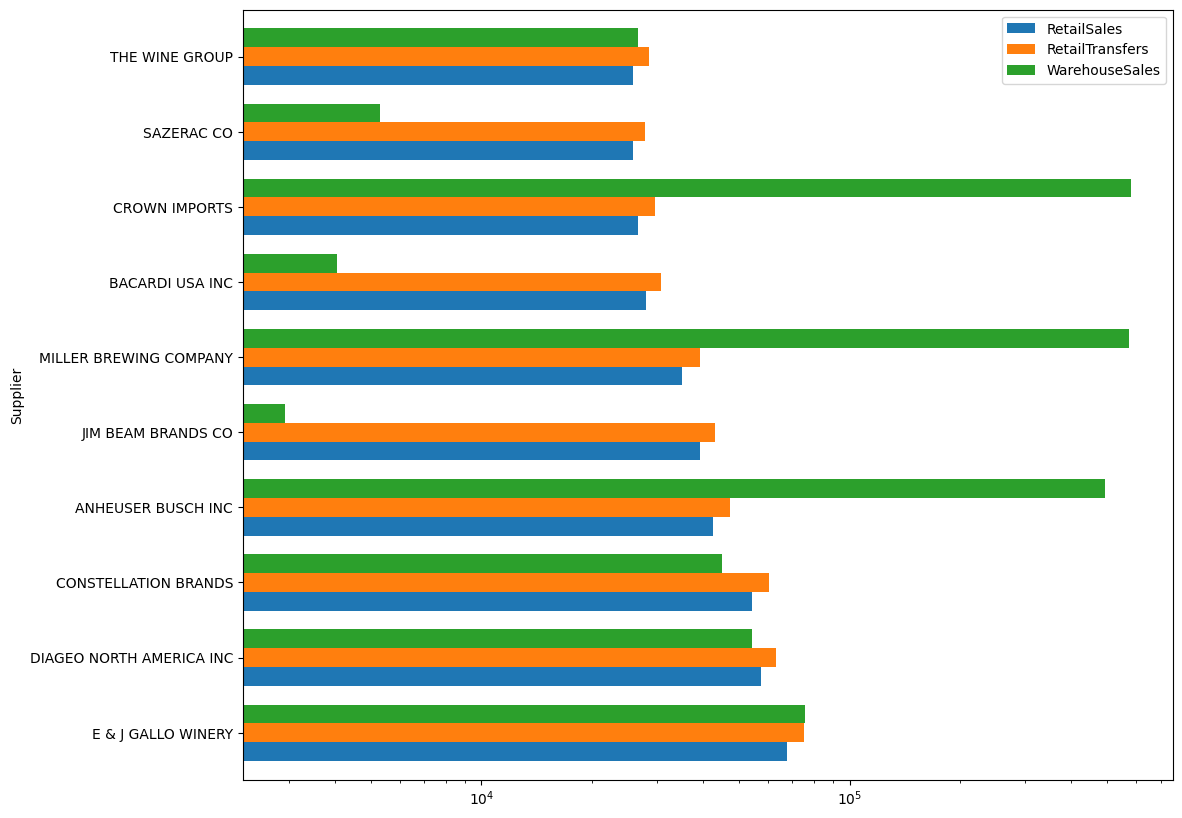

In [6]:
topsales = liquor.groupby("Supplier")[["RetailSales","RetailTransfers","WarehouseSales"]].sum()

top10sales = topsales.nlargest(10, topsales)

ax = top10sales.plot(kind="barh", figsize=(12,10), width=0.75)
ax.set_xscale('log')

plt.show()

In [7]:
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


## 3. Create a multi-line chart that shows average Retail Sales, Retail Transfers, and Warehouse Sales per month over time.

In [8]:
month_avg_sales = liquor.groupby(['Year', 'Month'])[['RetailSales', 'RetailTransfers', 'WarehouseSales']].mean()

month_avg_sales.head()

RetailSales  RetailTransfers  WarehouseSales
Year Month                                              
2017 4         0.000000        15.707503        0.000000
     5         7.038838         7.421817       27.310548
     6         7.143914         6.950396       27.839069
     8         6.409991         6.584726       28.122641
     9         6.757254         6.419721       22.817909

In [9]:
# With multindexing from the groupby subset, doing straight plotting would creat funky xticks
# Creating ad hoc xticks through list comprehension to isolate Month & Year from Groupby
# Multindexing might be considered a dict with a Year, Month key,value pair
# Where index[1] = Month & index[0] = Year

xticks = [f"{index[1]}\n{index[0]}" for index in liquor.groupby(['Year', 'Month']).groups.keys()]

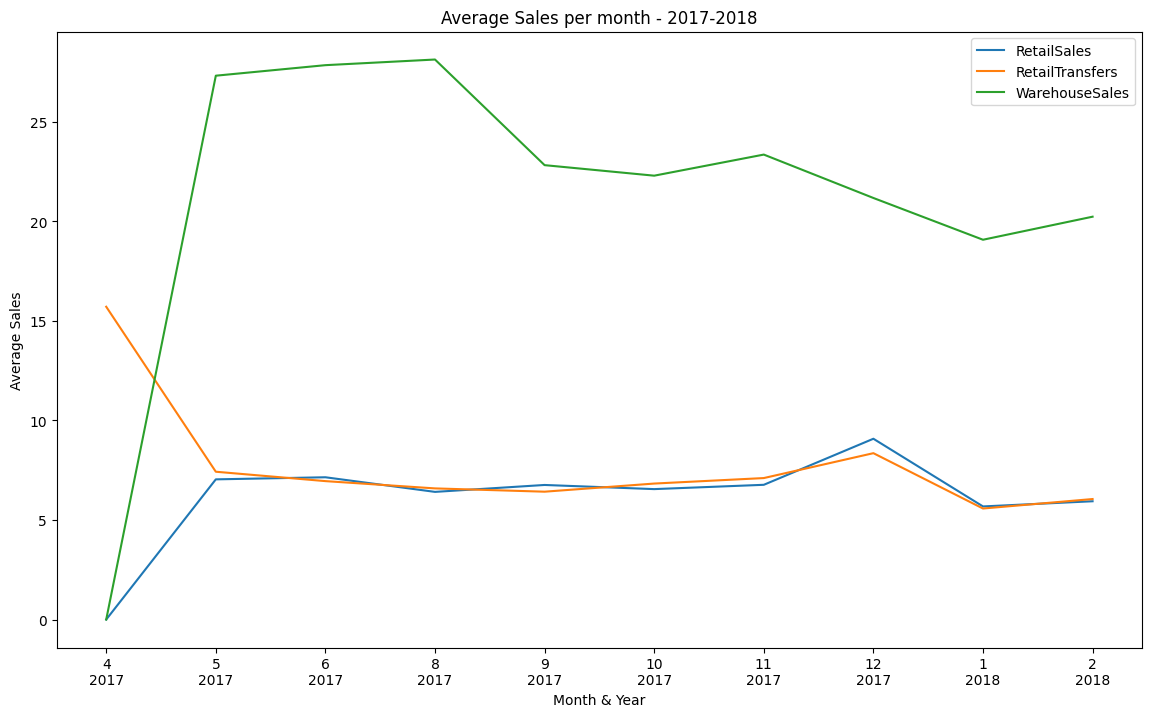

In [10]:
month_avg_sales.plot(kind='line', figsize=(14,8));
plt.xticks(ticks=range(len(xticks)), labels=xticks);

plt.title('Average Sales per month - 2017-2018', fontweight=500)
plt.ylabel('Average Sales')
plt.xlabel('Month & Year')
plt.show()

## 4. Plot the same information as above but as a bar chart.

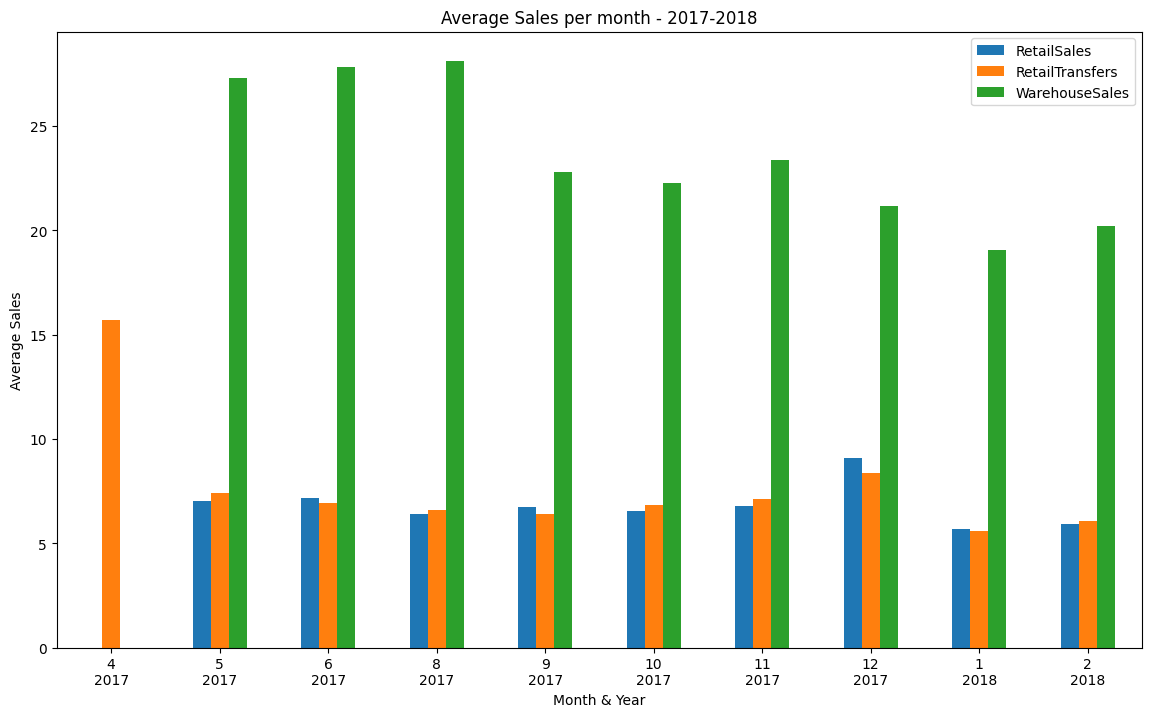

In [11]:
month_avg_sales.plot(kind='bar', figsize=(14,8));
plt.xticks(ticks=range(len(xticks)), labels=xticks, rotation=0);

plt.title('Average Sales per month - 2017-2018', fontweight=500)
plt.ylabel('Average Sales')
plt.xlabel('Month & Year')
plt.show()

## 5. Create a multi-line chart that shows Retail Sales summed by Item Type over time (Year & Month).

*Hint: There should be a line representing each Item Type.*

In [12]:
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [13]:
item_retail_sales = pd.pivot_table( data=liquor,
                                   values='RetailSales',
                                   index=["Year", "Month"],
                                   columns= "ItemType",
                                   aggfunc=sum,
                                   fill_value=0)

item_retail_sales


ItemType        BEER  DUNNAGE  KEGS    LIQUOR  NON-ALCOHOL    REF   
Year Month                                                          
2017 4          0.00        0     0      0.00         0.00   0.00  \
     5      25023.24        0     0  35123.36         0.00   0.00   
     6      27863.26        0     0  35035.31      1209.23  30.60   
     8      23030.13        0     0  32186.04      1091.28  19.54   
     9      23852.76        0     0  32532.32       997.11  38.88   
     10     22583.78        0     0  32491.59       945.63  22.82   
     11     23341.14        0     0  35524.77      1005.19  63.11   
     12     28822.16        0     0  49522.28      1316.44  41.21   
2018 1      16606.33        0     0  28579.87       732.25  23.66   
     2      18640.31        0     0  28852.31       812.84  41.52   

ItemType    STR_SUPPLIES      WINE  
Year Month                          
2017 4              0.00      0.00  
     5              0.00  34546.89  
     6             89.22  33129.64  
     8             77.34  30707.45  
     9             94.64  32936.89  
     10            84.38  33108.76  
     11           106.06  38275.92  
     12           439.64  51492.76  
2018 1             56.94  29792.72  
     2             47.76  29409.39

In [14]:
xticks = [f'{index[1]}\n{index[0]}' for index in liquor.groupby(["Year","Month"]).groups.keys()]

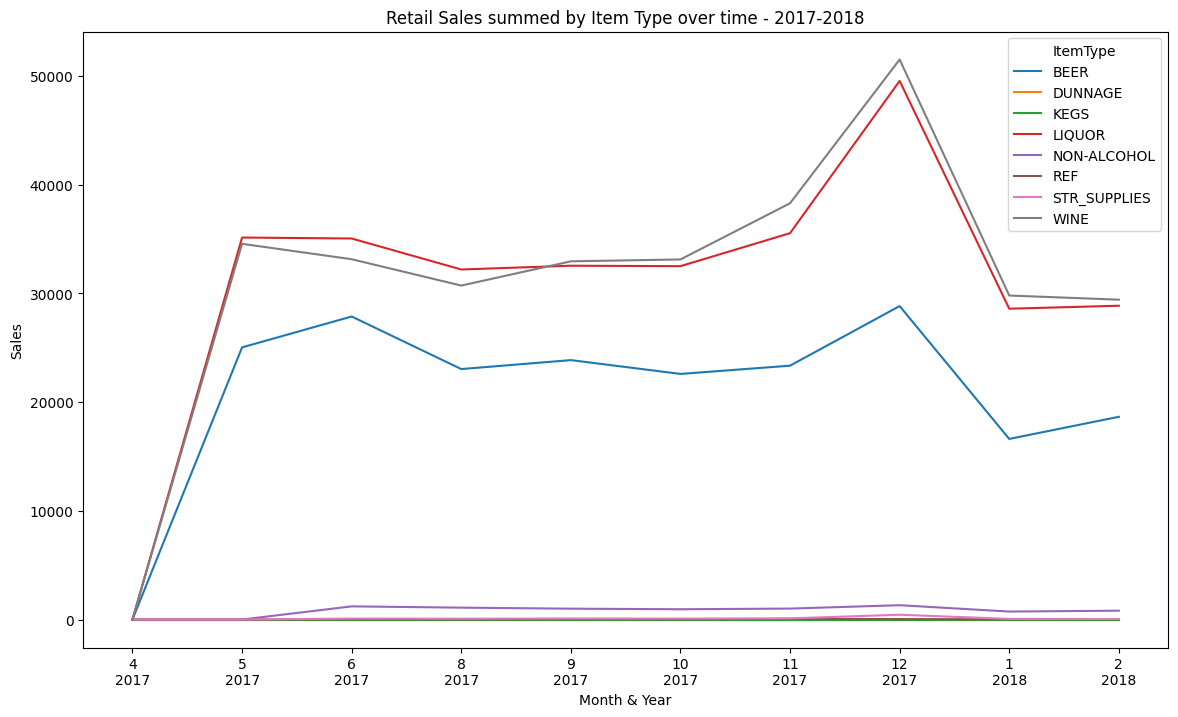

In [15]:
item_retail_sales.plot(kind='line', figsize=(14,8));
plt.xticks(ticks=range(len(xticks)), labels=xticks);

plt.title('Retail Sales summed by Item Type over time - 2017-2018', fontweight=500)
plt.ylabel('Sales')
plt.xlabel('Month & Year')
plt.show()

## 6. Plot the same information as above but as a bar chart.

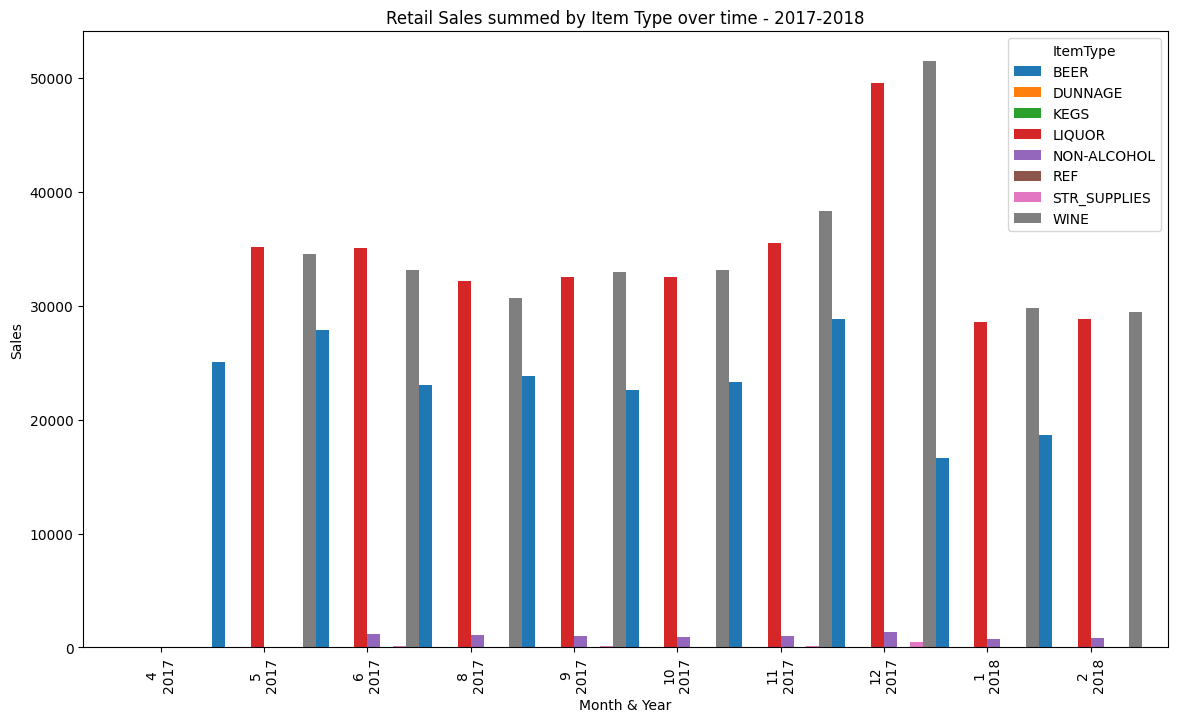

In [16]:
item_retail_sales.plot(kind='bar', figsize=(14,8), width=1);
plt.xticks(ticks=range(len(xticks)), labels=xticks);

plt.title('Retail Sales summed by Item Type over time - 2017-2018', fontweight=500)
plt.ylabel('Sales')
plt.xlabel('Month & Year')
plt.show()

## 7. Create a scatter plot showing the relationship between Retail Sales (x-axis) and Retail Transfers (y-axis) with the plot points color-coded according to their Item Type.

*Hint: Seaborn's lmplot is the easiest way to generate the scatter plot.*

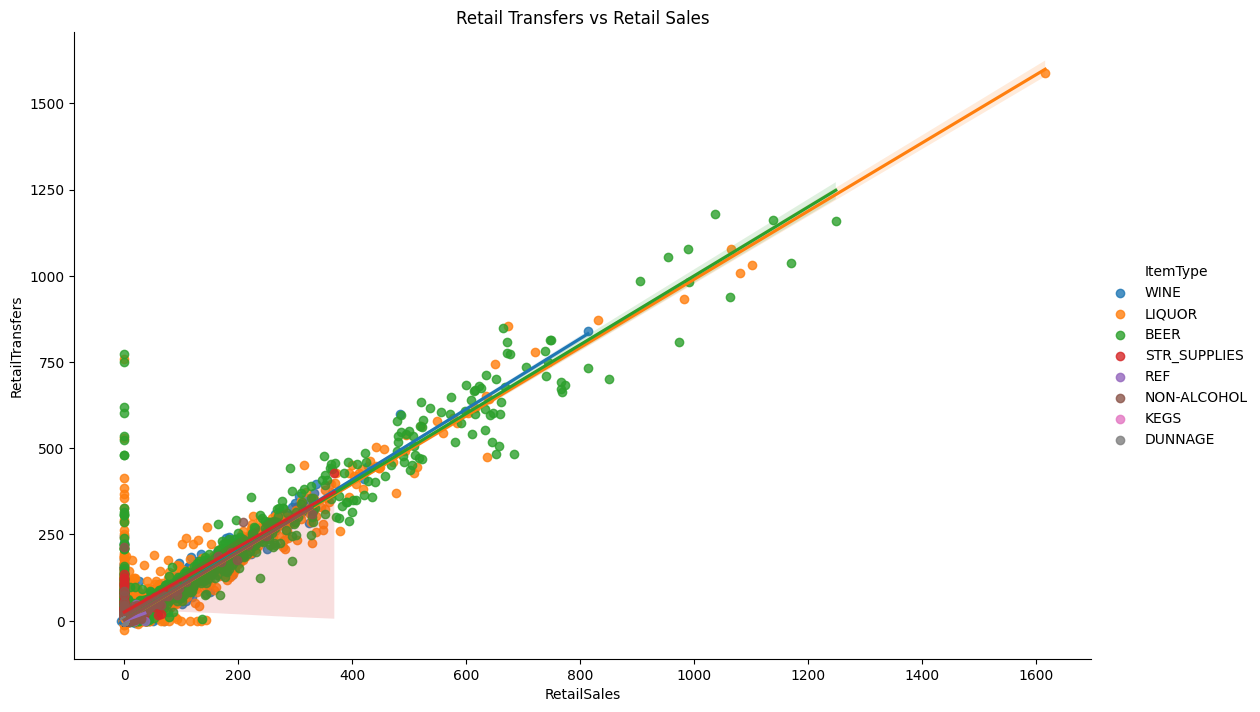

In [17]:
ax = sns.lmplot( data=liquor, x = "RetailSales"  , y = "RetailTransfers" , hue="ItemType" , height=7, aspect=1.6)
plt.title('Retail Transfers vs Retail Sales', fontweight=500)
plt.show()

## 8. Create a scatter matrix using all the numeric fields in the data set with the plot points color-coded by Item Type.

*Hint: Seaborn's pairplot may be your best option here.*

In [18]:
liquor.head()

,Year,Month,Supplier,ItemCode,Description,ItemType,RetailSales,RetailTransfers,WarehouseSales
0,2017,4,ROYAL WINE CORP,100200,GAMLA CAB - 750ML,WINE,0.0,1.0,0.0
1,2017,4,SANTA MARGHERITA USA INC,100749,SANTA MARGHERITA P/GRIG ALTO - 375ML,WINE,0.0,1.0,0.0
2,2017,4,JIM BEAM BRANDS CO,10103,KNOB CREEK BOURBON 9YR - 100P - 375ML,LIQUOR,0.0,8.0,0.0
3,2017,4,HEAVEN HILL DISTILLERIES INC,10120,J W DANT BOURBON 100P - 1.75L,LIQUOR,0.0,2.0,0.0
4,2017,4,ROYAL WINE CORP,101664,RAMON CORDOVA RIOJA - 750ML,WINE,0.0,4.0,0.0


In [19]:
# sns.pairplot(data=liquor, hue="ItemType", kind='scatter', diag_kind=None)
# plt.show()

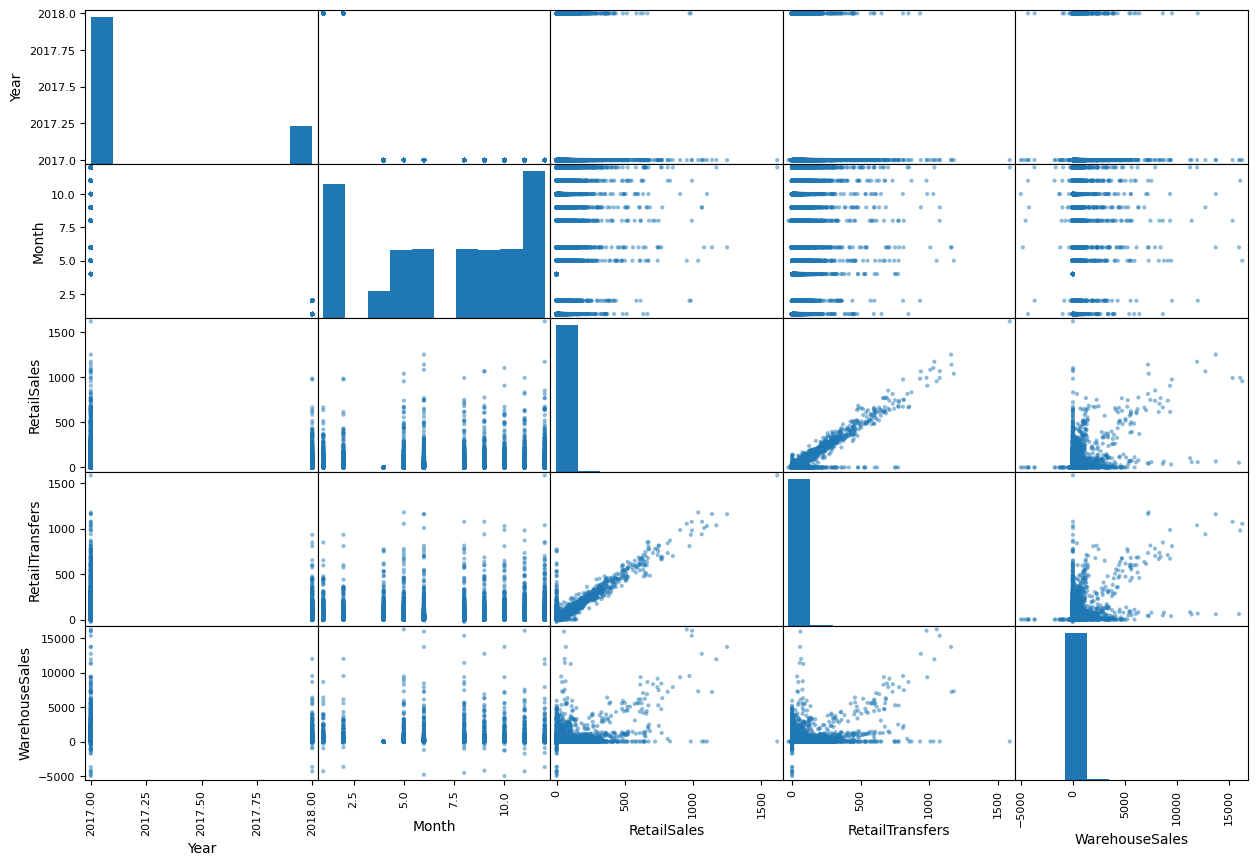

In [21]:
pd.plotting.scatter_matrix(liquor, figsize=(15,10));